In [1]:
using Revise
using Plots
using LaTeXStrings
using LinearAlgebra
using SparseIR
using Nevanlinna

In [2]:
# Set work data Type
T = BigFloat
setprecision(128)
;

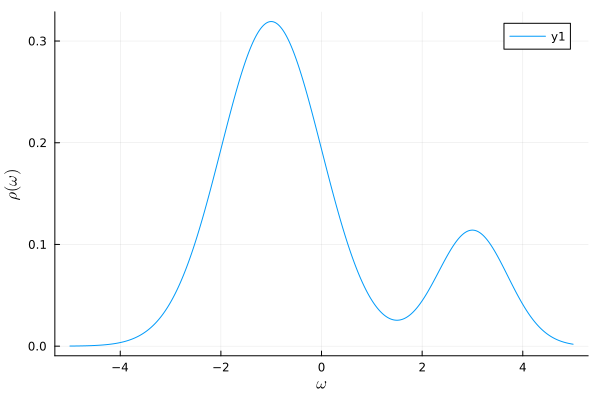

In [3]:
#define spectral function
gaussian(x, mu, sigma) = exp(-0.5*((x-mu)/sigma)^2)/(sqrt(2*π)*sigma)
rho(omega) = 0.8*gaussian(omega, -1.0, 1.0) + 0.2*gaussian(omega, 3, 0.7)
omegas = LinRange(-5, 5, 1000)
plot()
plot!(omegas, rho.(omegas), xlabel=latexstring("\\omega"), ylabel=latexstring("\\rho(\\omega)"))

In [4]:
function generate_input_data(rho::Function, beta::Float64)
    lambda = 1e+4
    wmax = lambda/beta
    basis = FiniteTempBasisSet(beta, wmax, 1e-15)

    rhol = [overlap(basis.basis_f.v[l], rho) for l in 1:length(basis.basis_f)]
    gl = - basis.basis_f.s .* rhol
    gw = evaluate(basis.smpl_wn_f, gl)
    
    hnw = length(basis.smpl_wn_f.sampling_points)÷2
    
    input_smpl = Array{Complex{T}}(undef, hnw) 
    input_gw   = Array{Complex{T}}(undef, hnw) 
    
    for i in 1:hnw
        input_smpl[i]= SparseIR.valueim(basis.smpl_wn_f.sampling_points[hnw+i], beta)
        input_gw[i]  = gw[hnw+i]
    end
    
    return input_smpl, input_gw
end

generate_input_data (generic function with 1 method)

In [5]:
beta = 100. #inverse temperature
input_smpl, input_gw = generate_input_data(rho, beta)
;

In [6]:
f64_input_smpl = ComplexF64.(input_smpl)
f64_input_gw   = ComplexF64.(input_gw)
;

In [7]:
N_real    = 1000  #demension of array of output
omega_max = 10.0  #energy cutoff of real axis
eta       = 0.001 #broaden parameter 
sum_rule  = 1.0   #sum rule
H_max     = 50    #cutoff of Hardy basis
lambda    = 1e-4  #regularization parameter
iter_tol  = 1000  #upper bound of iteration
;

In [8]:
#construct solver struct
@time sol     = Nevanlinna.NevanlinnaSolver(input_smpl, input_gw, N_real, omega_max, eta, sum_rule, H_max, iter_tol, lambda, verbose=true)
@time f64_sol = Nevanlinna.NevanlinnaSolver(f64_input_smpl, f64_input_gw, N_real, omega_max, eta, sum_rule, H_max, iter_tol, lambda, verbose=true)
;

N_imag is setted as 31
H=1
Iter     Function value   Gradient norm 
     0     9.050531e-01     5.094001e+00
 * time: 0.015072107315063477
     1     8.152167e-01     3.982333e+00
 * time: 1.0446710586547852
     2     4.035779e-01     5.450129e+00
 * time: 1.2909021377563477
     3     1.910854e-01     2.158235e+00
 * time: 1.3932089805603027
     4     1.565320e-01     2.165017e-01
 * time: 1.5280909538269043
     5     1.561898e-01     1.834678e-02
 * time: 1.7215549945831299
     6     1.561841e-01     4.391178e-03
 * time: 1.9172661304473877
     7     1.561839e-01     1.240366e-03
 * time: 2.1080069541931152
     8     1.561839e-01     3.309993e-04
 * time: 2.2457380294799805
     9     1.561839e-01     3.492742e-05
 * time: 2.3883540630340576
    10     1.561839e-01     5.151171e-06
 * time: 2.5800509452819824
    11     1.561839e-01     1.124102e-06
 * time: 2.766875982284546
    12     1.561839e-01     2.750608e-07
 * time: 2.9620890617370605
    13     1.561839e-01     2.9534

In [9]:
#execute optimize
@time Nevanlinna.solve!(sol)
@time Nevanlinna.solve!(f64_sol)

H=1
Iter     Function value   Gradient norm 
     0     1.561839e-01     6.243122e-09
 * time: 3.314018249511719e-5
max_theta=0.1628134357327177670612707285767895569134
hardy optimization was success.
H=2
Iter     Function value   Gradient norm 
     0     1.561839e-01     1.233090e+00
 * time: 0.0001590251922607422
     1     1.498561e-01     8.958772e-01
 * time: 0.21123695373535156
     2     1.400685e-01     9.291370e-01
 * time: 0.5549020767211914
     3     1.210241e-01     9.342923e-01
 * time: 0.7553040981292725
     4     3.871618e-02     7.831022e-01
 * time: 0.9260129928588867
     5     3.000783e-02     3.820936e-01
 * time: 1.102113962173462
     6     2.746334e-02     1.020176e-01
 * time: 1.2791900634765625
     7     2.727185e-02     1.662435e-02
 * time: 1.4529709815979004
     8     2.726284e-02     8.507493e-03
 * time: 1.6337080001831055
     9     2.726204e-02     2.783118e-03
 * time: 1.7458961009979248
    10     2.726197e-02     9.027024e-04
 * time: 1.931828022

    12     2.378011e-04     3.730892e-03
 * time: 2.5297629833221436
    13     2.366565e-04     6.101081e-03
 * time: 2.7830328941345215
    14     2.356797e-04     8.083295e-03
 * time: 3.054778814315796
    15     2.339290e-04     6.693717e-03
 * time: 3.3097598552703857
    16     2.326995e-04     5.773034e-03
 * time: 3.582326889038086
    17     2.306008e-04     6.514913e-03
 * time: 3.8407809734344482
    18     2.296039e-04     6.647206e-03
 * time: 4.097368955612183
    19     2.290375e-04     4.212432e-03
 * time: 4.365394830703735
    20     2.287212e-04     1.109249e-03
 * time: 4.617811918258667
    21     2.286187e-04     2.391163e-03
 * time: 4.870476961135864
    22     2.284418e-04     3.690695e-03
 * time: 5.146061897277832
    23     2.280147e-04     6.860283e-03
 * time: 5.395321846008301
    24     2.272074e-04     1.086931e-02
 * time: 5.666996002197266
    25     2.254325e-04     1.564949e-02
 * time: 5.932405948638916
    26     2.228912e-04     1.553435e-02
 * 

    34     4.059241e-05     2.419244e-04
 * time: 9.116818189620972
    35     4.058992e-05     3.740099e-04
 * time: 9.414038181304932
    36     4.058567e-05     5.972880e-04
 * time: 9.735563039779663
    37     4.057994e-05     8.888270e-04
 * time: 10.05021595954895
    38     4.056834e-05     1.392476e-03
 * time: 10.338126182556152
    39     4.055144e-05     1.919555e-03
 * time: 10.65803599357605
    40     4.051990e-05     2.711315e-03
 * time: 10.952218055725098
    41     4.047443e-05     3.528629e-03
 * time: 11.265201091766357
    42     4.039079e-05     4.755943e-03
 * time: 11.572662115097046
    43     4.027028e-05     5.942051e-03
 * time: 11.885832071304321
    44     4.005836e-05     7.356686e-03
 * time: 12.199071168899536
    45     3.973943e-05     8.420428e-03
 * time: 12.486128091812134
    46     3.919065e-05     7.791129e-03
 * time: 12.804797172546387
    47     3.841913e-05     2.406561e-03
 * time: 13.100325107574463
    48     3.827817e-05     1.817602e-0

     6     2.550712e-05     9.443838e-04
 * time: 1.455826997756958
     7     2.546863e-05     8.057346e-04
 * time: 1.702131986618042
     8     2.539669e-05     1.113988e-03
 * time: 1.9422478675842285
     9     2.532277e-05     1.010624e-03
 * time: 2.164719820022583
    10     2.526056e-05     1.254672e-03
 * time: 2.4103128910064697
    11     2.503606e-05     1.040183e-03
 * time: 2.659960985183716
    12     2.497802e-05     4.998467e-04
 * time: 2.9118030071258545
    13     2.476523e-05     1.989261e-03
 * time: 3.287519931793213
    14     2.461190e-05     2.974824e-03
 * time: 3.5102438926696777
    15     2.438244e-05     2.034340e-03
 * time: 3.7466368675231934
    16     2.431678e-05     1.288254e-03
 * time: 4.025587797164917
    17     2.428218e-05     1.351380e-03
 * time: 4.433659791946411
    18     2.425651e-05     8.778523e-04
 * time: 4.8286519050598145
    19     2.423529e-05     1.020824e-03
 * time: 5.07268500328064
    20     2.421031e-05     1.468570e-03
 *

    33     2.102645e-05     5.586496e-04
 * time: 10.301460981369019
    34     2.102017e-05     7.588975e-04
 * time: 10.674113988876343
    35     2.100881e-05     1.000606e-03
 * time: 11.049171924591064
    36     2.099950e-05     1.015121e-03
 * time: 11.437875986099243
    37     2.098483e-05     7.639061e-04
 * time: 11.823649883270264
    38     2.096523e-05     5.088268e-04
 * time: 12.19782304763794
    39     2.096231e-05     2.746110e-04
 * time: 12.447208881378174
    40     2.095740e-05     4.384250e-04
 * time: 12.798625946044922
    41     2.095086e-05     8.647827e-04
 * time: 13.180674076080322
    42     2.093776e-05     1.140938e-03
 * time: 13.569170951843262
    43     2.092273e-05     1.458979e-03
 * time: 13.945740938186646
    44     2.090319e-05     1.852408e-03
 * time: 14.334024906158447
    45     2.087960e-05     2.174322e-03
 * time: 14.709187030792236
    46     2.084664e-05     2.241121e-03
 * time: 15.055685997009277
    47     2.079167e-05     1.75204

    32     2.016407e-05     3.682996e-04
 * time: 10.236585855484009
    33     2.016291e-05     1.077828e-04
 * time: 10.503399848937988
    34     2.016195e-05     1.921740e-04
 * time: 10.908700942993164
    35     2.016138e-05     2.291019e-04
 * time: 11.313350915908813
    36     2.016019e-05     3.472162e-04
 * time: 11.723214864730835
    37     2.015931e-05     3.445477e-04
 * time: 12.117236852645874
    38     2.015768e-05     3.594473e-04
 * time: 12.508226871490479
    39     2.015548e-05     3.448482e-04
 * time: 12.901444911956787
    40     2.015089e-05     2.298837e-04
 * time: 13.296252012252808
    41     2.015003e-05     1.778016e-04
 * time: 13.558895826339722
    42     2.014916e-05     1.707548e-04
 * time: 13.933976888656616
    43     2.014864e-05     2.781427e-04
 * time: 14.324520826339722
    44     2.014750e-05     3.084243e-04
 * time: 14.713171005249023
    45     2.014659e-05     3.592103e-04
 * time: 15.10642695426941
    46     2.014507e-05     3.87978

    13     1.989808e-05     1.155012e-04
 * time: 3.6364400386810303
    14     1.989643e-05     1.082665e-04
 * time: 3.9097001552581787
    15     1.989558e-05     1.617414e-04
 * time: 4.184770107269287
    16     1.989408e-05     8.153297e-05
 * time: 4.456509113311768
    17     1.989029e-05     3.124854e-04
 * time: 4.871252059936523
    18     1.988924e-05     2.580992e-04
 * time: 5.148248195648193
    19     1.988805e-05     1.972197e-04
 * time: 5.42067813873291
    20     1.988617e-05     1.860153e-04
 * time: 5.833609104156494
    21     1.988217e-05     1.431631e-04
 * time: 6.252101182937622
    22     1.988023e-05     2.702350e-04
 * time: 6.678872108459473
    23     1.987812e-05     3.286846e-04
 * time: 7.087341070175171
    24     1.987606e-05     8.009561e-05
 * time: 7.503850221633911
    25     1.987538e-05     1.489337e-04
 * time: 7.930049180984497
    26     1.987385e-05     2.771513e-04
 * time: 8.342365026473999
    27     1.987189e-05     1.778556e-04
 * tim

   133     1.980658e-05     1.003435e-04
 * time: 47.78840708732605
   134     1.980657e-05     1.050498e-04
 * time: 48.062841176986694
   135     1.980654e-05     1.257090e-04
 * time: 48.48813319206238
   136     1.980652e-05     1.314896e-04
 * time: 48.767810106277466
   137     1.980648e-05     1.568936e-04
 * time: 49.17898917198181
   138     1.980645e-05     1.639468e-04
 * time: 49.45672106742859
   139     1.980639e-05     1.952474e-04
 * time: 49.88712811470032
   140     1.980633e-05     2.038193e-04
 * time: 50.166205167770386
   141     1.980625e-05     2.424217e-04
 * time: 50.582096099853516
   142     1.980616e-05     2.527668e-04
 * time: 50.86549615859985
   143     1.980603e-05     3.003928e-04
 * time: 51.28845000267029
   144     1.980590e-05     3.127697e-04
 * time: 51.56318020820618
   145     1.980570e-05     3.715445e-04
 * time: 51.97688102722168
   146     1.980550e-05     3.861992e-04
 * time: 52.2688992023468
   147     1.980518e-05     4.586767e-04
 * t

    72     1.975461e-05     9.829662e-05
 * time: 27.651333808898926
    73     1.975457e-05     9.961502e-05
 * time: 27.954596996307373
    74     1.975451e-05     1.299836e-04
 * time: 28.40544581413269
    75     1.975446e-05     1.331141e-04
 * time: 28.711366891860962
    76     1.975437e-05     1.631202e-04
 * time: 29.169142961502075
    77     1.975431e-05     1.666103e-04
 * time: 29.46173596382141
    78     1.975419e-05     1.962543e-04
 * time: 29.913992881774902
    79     1.975409e-05     1.989250e-04
 * time: 30.22284483909607
    80     1.975388e-05     2.142610e-04
 * time: 30.66706085205078
    81     1.975356e-05     1.970096e-04
 * time: 31.1211199760437
    82     1.975269e-05     1.648043e-04
 * time: 31.570770978927612
    83     1.975253e-05     4.197189e-05
 * time: 31.872601985931396
    84     1.975248e-05     2.481933e-05
 * time: 32.3158278465271
    85     1.975247e-05     2.593188e-05
 * time: 32.619186878204346
    86     1.975247e-05     1.420466e-05
 

   192     1.974039e-05     1.553385e-04
 * time: 66.34463381767273
   193     1.974037e-05     1.625752e-04
 * time: 66.64285397529602
   194     1.974034e-05     1.797540e-04
 * time: 66.94881296157837
   195     1.974031e-05     1.879650e-04
 * time: 67.25449395179749
   196     1.974027e-05     2.079243e-04
 * time: 67.55619382858276
   197     1.974023e-05     2.172133e-04
 * time: 67.85646200180054
   198     1.974017e-05     2.404467e-04
 * time: 68.16708898544312
   199     1.974011e-05     2.509166e-04
 * time: 68.46950697898865
   200     1.974004e-05     2.780212e-04
 * time: 68.92588782310486
   201     1.973996e-05     2.897660e-04
 * time: 69.22096300125122
   202     1.973986e-05     3.214682e-04
 * time: 69.67124390602112
   203     1.973975e-05     3.345568e-04
 * time: 69.98025393486023
   204     1.973961e-05     3.717388e-04
 * time: 70.41995000839233
   205     1.973946e-05     3.861794e-04
 * time: 70.73108887672424
   206     1.973925e-05     4.298765e-04
 * time

    70     1.971941e-05     7.415394e-05
 * time: 29.39822793006897
    71     1.971939e-05     7.424765e-05
 * time: 29.721406936645508
    72     1.971935e-05     9.313787e-05
 * time: 30.2052321434021
    73     1.971933e-05     9.530144e-05
 * time: 30.52779507637024
    74     1.971928e-05     1.084960e-04
 * time: 31.013550996780396
    75     1.971924e-05     1.086208e-04
 * time: 31.494786977767944
    76     1.971914e-05     1.126686e-04
 * time: 31.980322122573853
    77     1.971890e-05     8.164270e-05
 * time: 32.620903968811035
    78     1.971882e-05     7.738308e-05
 * time: 32.95804715156555
    79     1.971877e-05     3.209583e-05
 * time: 33.278635025024414
    80     1.971875e-05     1.799463e-05
 * time: 33.59743404388428
    81     1.971875e-05     1.269269e-05
 * time: 33.91546607017517
    82     1.971874e-05     2.418621e-05
 * time: 34.400187969207764
    83     1.971873e-05     1.887336e-05
 * time: 34.7126259803772
    84     1.971873e-05     2.757519e-05
 *

   191     1.971373e-05     7.824647e-05
 * time: 79.07939100265503
   192     1.971372e-05     7.658742e-05
 * time: 79.39935111999512
   193     1.971370e-05     9.624506e-05
 * time: 79.88239002227783
   194     1.971369e-05     9.415769e-05
 * time: 80.19639992713928
   195     1.971366e-05     1.182999e-04
 * time: 80.67907810211182
   196     1.971364e-05     1.156085e-04
 * time: 80.99387192726135
   197     1.971360e-05     1.452288e-04
 * time: 81.46262693405151
   198     1.971357e-05     1.417561e-04
 * time: 81.7820999622345
   199     1.971350e-05     1.783767e-04
 * time: 82.25063705444336
   200     1.971346e-05     1.738882e-04
 * time: 82.5658929347992
   201     1.971336e-05     2.182799e-04
 * time: 83.04667901992798
   202     1.971329e-05     2.123716e-04
 * time: 83.35380101203918
   203     1.971313e-05     2.669262e-04
 * time: 83.81689596176147
   204     1.971302e-05     2.593067e-04
 * time: 84.14602994918823
   205     1.971276e-05     3.223572e-04
 * time: 

    72     1.970386e-05     3.360544e-05
 * time: 30.641608953475952
    73     1.970384e-05     4.483175e-05
 * time: 31.14643907546997
    74     1.970380e-05     3.908518e-05
 * time: 31.81662392616272
    75     1.970379e-05     2.327730e-05
 * time: 32.13624286651611
    76     1.970378e-05     2.758001e-05
 * time: 32.47157907485962
    77     1.970378e-05     3.014835e-06
 * time: 32.8051860332489
    78     1.970377e-05     1.878577e-05
 * time: 33.31191086769104
    79     1.970377e-05     5.955300e-06
 * time: 33.65362906455994
    80     1.970376e-05     2.123772e-05
 * time: 34.15332889556885
    81     1.970376e-05     1.120696e-05
 * time: 34.485573053359985
    82     1.970376e-05     2.566990e-05
 * time: 34.97798800468445
    83     1.970376e-05     1.926218e-05
 * time: 35.3150520324707
    84     1.970375e-05     3.098848e-05
 * time: 35.80697989463806
    85     1.970375e-05     2.456605e-05
 * time: 36.15505290031433
    86     1.970374e-05     3.582614e-05
 * time

   193     1.970125e-05     1.945712e-06
 * time: 81.91072487831116
   194     1.970125e-05     9.926111e-07
 * time: 82.23906397819519
   195     1.970125e-05     9.964444e-07
 * time: 82.73394393920898
   196     1.970125e-05     4.616665e-07
 * time: 83.05854797363281
   197     1.970125e-05     6.340689e-07
 * time: 83.55634808540344
   198     1.970125e-05     1.574110e-07
 * time: 83.89704203605652
   199     1.970125e-05     4.885970e-07
 * time: 84.37659406661987
   200     1.970125e-05     2.294142e-07
 * time: 84.70822286605835
   201     1.970125e-05     5.606996e-07
 * time: 85.20888805389404
   202     1.970125e-05     4.338513e-07
 * time: 85.5605890750885
   203     1.970125e-05     7.841357e-07
 * time: 86.06198906898499
   204     1.970125e-05     6.523608e-07
 * time: 86.39510989189148
   205     1.970125e-05     1.038676e-06
 * time: 86.88918089866638
   206     1.970125e-05     9.023835e-07
 * time: 87.2175030708313
   207     1.970125e-05     1.334706e-06
 * time: 

    12     1.969639e-05     3.213118e-05
 * time: 4.18812108039856
    13     1.969637e-05     2.161897e-05
 * time: 4.522813081741333
    14     1.969634e-05     2.145657e-05
 * time: 4.874406099319458
    15     1.969631e-05     2.070661e-05
 * time: 5.232986211776733
    16     1.969627e-05     3.033159e-05
 * time: 5.5829691886901855
    17     1.969623e-05     1.812576e-05
 * time: 5.929236173629761
    18     1.969620e-05     2.299503e-05
 * time: 6.2757580280303955
    19     1.969617e-05     1.723354e-05
 * time: 6.621017217636108
    20     1.969611e-05     2.685696e-05
 * time: 6.968291997909546
    21     1.969605e-05     1.728007e-05
 * time: 7.504863023757935
    22     1.969602e-05     3.212026e-05
 * time: 7.842242002487183
    23     1.969597e-05     8.290712e-05
 * time: 8.194375991821289
    24     1.969591e-05     3.680545e-05
 * time: 8.543905019760132
    25     1.969579e-05     2.753976e-05
 * time: 9.094012022018433
    26     1.969577e-05     2.133955e-05
 * tim

   132     1.969396e-05     7.390823e-06
 * time: 58.97814917564392
   133     1.969396e-05     8.038489e-06
 * time: 59.32951903343201
   134     1.969396e-05     9.102646e-06
 * time: 59.67084217071533
   135     1.969396e-05     9.833358e-06
 * time: 60.02119016647339
   136     1.969396e-05     1.093748e-05
 * time: 60.39316201210022
   137     1.969396e-05     1.178942e-05
 * time: 60.732046127319336
   138     1.969396e-05     1.290524e-05
 * time: 61.07395601272583
   139     1.969396e-05     1.387880e-05
 * time: 61.430554151535034
   140     1.969396e-05     1.503842e-05
 * time: 61.781612157821655
   141     1.969396e-05     1.612081e-05
 * time: 62.13048219680786
   142     1.969395e-05     1.734672e-05
 * time: 62.48345708847046
   143     1.969395e-05     1.849572e-05
 * time: 62.830915212631226
   144     1.969395e-05     1.978628e-05
 * time: 63.18139600753784
   145     1.969395e-05     2.098317e-05
 * time: 63.52769708633423
   146     1.969395e-05     2.233885e-05
 * 

   253     1.969259e-05     2.684305e-05
 * time: 107.3570671081543
   254     1.969258e-05     2.600290e-05
 * time: 107.70294404029846
   255     1.969258e-05     3.070896e-05
 * time: 108.22242498397827
   256     1.969258e-05     2.977905e-05
 * time: 108.56420421600342
   257     1.969258e-05     3.505457e-05
 * time: 109.07322001457214
   258     1.969258e-05     3.401601e-05
 * time: 109.43567514419556
   259     1.969258e-05     3.995309e-05
 * time: 109.95239520072937
   260     1.969257e-05     3.878484e-05
 * time: 110.3160171508789
   261     1.969257e-05     4.543959e-05
 * time: 110.8448760509491
   262     1.969257e-05     4.411301e-05
 * time: 111.18992900848389
   263     1.969256e-05     5.158384e-05
 * time: 111.70957517623901
   264     1.969256e-05     5.009024e-05
 * time: 112.05242419242859
   265     1.969256e-05     5.846514e-05
 * time: 112.56295108795166
   266     1.969255e-05     5.678806e-05
 * time: 112.92591619491577
   267     1.969255e-05     6.611345e

   373     1.968964e-05     2.483047e-04
 * time: 159.70335912704468
   374     1.968941e-05     2.607882e-04
 * time: 160.2174370288849
   375     1.968865e-05     2.506647e-04
 * time: 160.73511910438538
   376     1.968659e-05     1.752179e-04
 * time: 161.41366720199585
   377     1.968638e-05     1.094759e-04
 * time: 161.7692790031433
   378     1.968599e-05     7.411465e-05
 * time: 162.1025791168213
   379     1.968595e-05     4.748423e-05
 * time: 162.4534330368042
   380     1.968592e-05     4.534310e-05
 * time: 162.97640705108643
   381     1.968591e-05     2.126344e-05
 * time: 163.33052110671997
   382     1.968589e-05     2.590530e-05
 * time: 163.83857417106628
   383     1.968589e-05     1.280857e-05
 * time: 164.1867790222168
   384     1.968589e-05     1.453962e-05
 * time: 164.6890001296997
   385     1.968589e-05     8.460770e-06
 * time: 165.0445511341095
   386     1.968588e-05     8.096696e-06
 * time: 165.54947209358215
   387     1.968588e-05     3.651142e-06


    81     1.968288e-05     1.163883e-05
 * time: 37.76136088371277
    82     1.968288e-05     1.403906e-05
 * time: 38.289201974868774
    83     1.968288e-05     1.504116e-05
 * time: 38.65493988990784
    84     1.968287e-05     1.848860e-05
 * time: 39.19637989997864
    85     1.968287e-05     1.961730e-05
 * time: 39.55423593521118
    86     1.968287e-05     2.294985e-05
 * time: 40.08692502975464
    87     1.968287e-05     2.392270e-05
 * time: 40.434463024139404
    88     1.968286e-05     2.739516e-05
 * time: 40.98383593559265
    89     1.968286e-05     2.795871e-05
 * time: 41.34437298774719
    90     1.968285e-05     3.257727e-05
 * time: 41.895933866500854
    91     1.968285e-05     3.315617e-05
 * time: 42.25376486778259
    92     1.968285e-05     3.814719e-05
 * time: 42.78547501564026
    93     1.968284e-05     3.869847e-05
 * time: 43.14071083068848
    94     1.968284e-05     4.375800e-05
 * time: 43.6887788772583
    95     1.968283e-05     4.450804e-05
 * ti

   202     1.968171e-05     5.707918e-05
 * time: 91.41990399360657
   203     1.968171e-05     6.366812e-05
 * time: 91.96330285072327
   204     1.968170e-05     6.270207e-05
 * time: 92.3241229057312
   205     1.968170e-05     6.983318e-05
 * time: 92.86050987243652
   206     1.968169e-05     6.881440e-05
 * time: 93.21702790260315
   207     1.968169e-05     7.656296e-05
 * time: 93.76923203468323
   208     1.968168e-05     7.548417e-05
 * time: 94.11390686035156
   209     1.968167e-05     8.393200e-05
 * time: 94.66090893745422
   210     1.968167e-05     8.278149e-05
 * time: 95.01939392089844
   211     1.968166e-05     9.202339e-05
 * time: 95.55999493598938
   212     1.968165e-05     9.078611e-05
 * time: 95.91633987426758
   213     1.968164e-05     1.009422e-04
 * time: 96.44811081886292
   214     1.968163e-05     9.960329e-05
 * time: 96.8219518661499
   215     1.968161e-05     1.108326e-04
 * time: 97.36109399795532
   216     1.968160e-05     1.093804e-04
 * time: 

   322     1.967944e-05     2.366842e-05
 * time: 137.84130001068115
   323     1.967944e-05     2.505707e-05
 * time: 138.21409702301025
   324     1.967944e-05     2.518411e-05
 * time: 138.55910801887512
   325     1.967944e-05     2.665081e-05
 * time: 138.92473983764648
   326     1.967944e-05     2.678726e-05
 * time: 139.3254678249359
   327     1.967944e-05     2.833710e-05
 * time: 139.71690583229065
   328     1.967944e-05     2.848343e-05
 * time: 140.1000018119812
   329     1.967944e-05     3.012182e-05
 * time: 140.45619893074036
   330     1.967944e-05     3.027851e-05
 * time: 140.8052158355713
   331     1.967944e-05     3.201128e-05
 * time: 141.17529487609863
   332     1.967944e-05     3.217883e-05
 * time: 141.52515292167664
   333     1.967944e-05     3.401236e-05
 * time: 141.87916493415833
   334     1.967944e-05     3.419129e-05
 * time: 142.2440369129181
   335     1.967944e-05     3.613249e-05
 * time: 142.60440301895142
   336     1.967944e-05     3.632335e-

   442     1.967661e-05     3.628105e-06
 * time: 188.20832586288452
   443     1.967661e-05     4.630484e-06
 * time: 188.7465009689331
   444     1.967661e-05     4.338736e-06
 * time: 189.10410499572754
   445     1.967661e-05     5.366448e-06
 * time: 189.63654398918152
   446     1.967661e-05     4.936346e-06
 * time: 189.9822599887848
   447     1.967661e-05     7.001857e-06
 * time: 190.5101718902588
   448     1.967661e-05     6.629746e-06
 * time: 190.85118889808655
   449     1.967661e-05     8.147456e-06
 * time: 191.40688300132751
   450     1.967661e-05     7.791182e-06
 * time: 191.75254583358765
   451     1.967661e-05     1.034068e-05
 * time: 192.296728849411
   452     1.967661e-05     1.010626e-05
 * time: 192.64757084846497
   453     1.967661e-05     1.126842e-05
 * time: 193.17007398605347
   454     1.967661e-05     1.100401e-05
 * time: 193.522882938385
   455     1.967661e-05     1.372175e-05
 * time: 194.05900287628174
   456     1.967661e-05     1.344367e-05


    23     1.966805e-05     2.372836e-05
 * time: 8.489815950393677
    24     1.966802e-05     1.848833e-05
 * time: 8.855224847793579
    25     1.966797e-05     7.389013e-06
 * time: 9.216216802597046
    26     1.966791e-05     2.198691e-05
 * time: 9.777541875839233
    27     1.966783e-05     3.755502e-05
 * time: 10.336057901382446
    28     1.966780e-05     2.314096e-05
 * time: 10.88883900642395
    29     1.966778e-05     2.257271e-05
 * time: 11.430469989776611
    30     1.966770e-05     1.953046e-05
 * time: 11.994933843612671
    31     1.966765e-05     3.303847e-05
 * time: 12.537563800811768
    32     1.966753e-05     6.200102e-05
 * time: 13.09468388557434
    33     1.966745e-05     3.489515e-05
 * time: 13.463828802108765
    34     1.966743e-05     1.598585e-05
 * time: 14.007728815078735
    35     1.966740e-05     2.759260e-05
 * time: 14.573753833770752
    36     1.966733e-05     1.358368e-05
 * time: 15.132539987564087
    37     1.966732e-05     1.174406e-05

   143     1.966574e-05     4.627304e-05
 * time: 64.31688284873962
   144     1.966570e-05     4.236609e-05
 * time: 64.69913983345032
   145     1.966568e-05     3.013150e-05
 * time: 65.05231595039368
   146     1.966566e-05     3.212537e-05
 * time: 65.43009686470032
   147     1.966564e-05     2.185582e-05
 * time: 65.80312490463257
   148     1.966563e-05     2.295669e-05
 * time: 66.1693229675293
   149     1.966562e-05     1.319606e-05
 * time: 66.53628396987915
   150     1.966562e-05     1.513507e-05
 * time: 66.89495491981506
   151     1.966561e-05     8.381990e-06
 * time: 67.25013089179993
   152     1.966561e-05     1.201084e-05
 * time: 67.63709592819214
   153     1.966561e-05     6.842631e-06
 * time: 68.0038788318634
   154     1.966561e-05     1.023434e-05
 * time: 68.37542390823364
   155     1.966560e-05     6.493654e-06
 * time: 68.74695682525635
   156     1.966560e-05     9.498166e-06
 * time: 69.10897183418274
   157     1.966560e-05     7.507363e-06
 * time: 

   264     1.966537e-05     1.018354e-05
 * time: 110.47628879547119
   265     1.966537e-05     1.091575e-05
 * time: 110.84982585906982
   266     1.966537e-05     1.089341e-05
 * time: 111.21546578407288
   267     1.966537e-05     1.165069e-05
 * time: 111.57539081573486
   268     1.966537e-05     1.163423e-05
 * time: 111.93465900421143
   269     1.966537e-05     1.241848e-05
 * time: 112.3195469379425
   270     1.966537e-05     1.240795e-05
 * time: 112.67321181297302
   271     1.966537e-05     1.322086e-05
 * time: 113.04538297653198
   272     1.966537e-05     1.321540e-05
 * time: 113.41992282867432
   273     1.966537e-05     1.405817e-05
 * time: 113.78630900382996
   274     1.966537e-05     1.405726e-05
 * time: 114.15438294410706
   275     1.966537e-05     1.493097e-05
 * time: 114.51838779449463
   276     1.966537e-05     1.493505e-05
 * time: 114.87613081932068
   277     1.966537e-05     1.584184e-05
 * time: 115.26280784606934
   278     1.966537e-05     1.58510

   384     1.966437e-05     4.564942e-07
 * time: 157.74977779388428
   385     1.966437e-05     5.426114e-07
 * time: 158.12157678604126
   386     1.966437e-05     5.335625e-07
 * time: 158.49409699440002
   387     1.966437e-05     6.323011e-07
 * time: 158.86232089996338
   388     1.966437e-05     6.308435e-07
 * time: 159.22259283065796
   389     1.966437e-05     7.336092e-07
 * time: 159.58435487747192
   390     1.966437e-05     7.389803e-07
 * time: 159.96949696540833
   391     1.966437e-05     8.414374e-07
 * time: 160.3233139514923
   392     1.966437e-05     8.561527e-07
 * time: 160.69253778457642
   393     1.966437e-05     9.549234e-07
 * time: 161.06615090370178
   394     1.966437e-05     9.805257e-07
 * time: 161.43484687805176
   395     1.966437e-05     1.075192e-06
 * time: 161.798681974411
   396     1.966437e-05     1.109427e-06
 * time: 162.16431283950806
   397     1.966437e-05     1.201941e-06
 * time: 162.52134585380554
   398     1.966437e-05     1.242289e

   504     1.966437e-05     1.664972e-05
 * time: 202.0164279937744
   505     1.966437e-05     1.694482e-05
 * time: 202.38134789466858
   506     1.966437e-05     1.718478e-05
 * time: 202.76716780662537
   507     1.966437e-05     1.748786e-05
 * time: 203.1277778148651
   508     1.966437e-05     1.773354e-05
 * time: 203.49860978126526
   509     1.966437e-05     1.804483e-05
 * time: 203.86795592308044
   510     1.966437e-05     1.829633e-05
 * time: 204.23459696769714
   511     1.966437e-05     1.861609e-05
 * time: 204.59872698783875
   512     1.966437e-05     1.887353e-05
 * time: 204.95602893829346
   513     1.966437e-05     1.920202e-05
 * time: 205.33877897262573
   514     1.966437e-05     1.946549e-05
 * time: 205.69930791854858
   515     1.966437e-05     1.980298e-05
 * time: 206.07130980491638
   516     1.966437e-05     2.007260e-05
 * time: 206.45119380950928
   517     1.966437e-05     2.041936e-05
 * time: 206.81789588928223
   518     1.966437e-05     2.069526

   624     1.966430e-05     9.213656e-05
 * time: 246.32433581352234
   625     1.966430e-05     9.398721e-05
 * time: 246.69766092300415
   626     1.966430e-05     9.471368e-05
 * time: 247.06232595443726
   627     1.966430e-05     9.663821e-05
 * time: 247.42631888389587
   628     1.966429e-05     9.736979e-05
 * time: 247.7795069217682
   629     1.966429e-05     9.937267e-05
 * time: 248.16087579727173
   630     1.966429e-05     1.001086e-04
 * time: 248.52510499954224
   631     1.966429e-05     1.021947e-04
 * time: 248.89463782310486
   632     1.966429e-05     1.029342e-04
 * time: 249.26702094078064
   633     1.966428e-05     1.051091e-04
 * time: 249.6322000026703
   634     1.966428e-05     1.058511e-04
 * time: 249.99072790145874
   635     1.966428e-05     1.081207e-04
 * time: 250.3458788394928
   636     1.966427e-05     1.088643e-04
 * time: 250.72928190231323
   637     1.966427e-05     1.112354e-04
 * time: 251.0925509929657
   638     1.966427e-05     1.119793e-

   744     1.966138e-05     1.854398e-06
 * time: 298.57295179367065
   745     1.966138e-05     2.354136e-06
 * time: 299.1170518398285
   746     1.966138e-05     2.220343e-06
 * time: 299.47638487815857
   747     1.966138e-05     2.606133e-06
 * time: 300.007798910141
   748     1.966138e-05     2.490929e-06
 * time: 300.38358092308044
   749     1.966138e-05     2.999846e-06
 * time: 300.92317390441895
   750     1.966138e-05     2.821885e-06
 * time: 301.2955279350281
   751     1.966138e-05     3.314726e-06
 * time: 301.83616280555725
   752     1.966138e-05     3.101295e-06
 * time: 302.19817781448364
   753     1.966138e-05     3.969305e-06
 * time: 302.72853088378906
   754     1.966138e-05     3.737956e-06
 * time: 303.1039447784424
   755     1.966138e-05     4.512197e-06
 * time: 303.6474058628082
   756     1.966138e-05     4.295973e-06
 * time: 304.01247787475586
   757     1.966138e-05     5.195864e-06
 * time: 304.55740189552307
   758     1.966138e-05     4.825783e-06

     6     1.965846e-05     3.042065e-05
 * time: 2.2671661376953125
     7     1.965845e-05     2.200971e-05
 * time: 2.6399450302124023
     8     1.965844e-05     2.399706e-05
 * time: 3.0189521312713623
     9     1.965843e-05     2.025084e-05
 * time: 3.398329973220825
    10     1.965841e-05     2.126700e-05
 * time: 3.7675399780273438
    11     1.965839e-05     2.708336e-05
 * time: 4.132617950439453
    12     1.965837e-05     4.138021e-05
 * time: 4.528126001358032
    13     1.965834e-05     3.996603e-05
 * time: 4.891474008560181
    14     1.965832e-05     4.231811e-05
 * time: 5.267642021179199
    15     1.965829e-05     3.121772e-05
 * time: 5.649877071380615
    16     1.965826e-05     4.517222e-05
 * time: 6.01793098449707
    17     1.965824e-05     3.649637e-05
 * time: 6.391077995300293
    18     1.965819e-05     4.035562e-05
 * time: 6.787266969680786
    19     1.965812e-05     2.749641e-05
 * time: 7.149633169174194
    20     1.965804e-05     3.112236e-05
 * t

   126     1.965360e-05     1.222858e-05
 * time: 59.68902516365051
   127     1.965359e-05     2.583591e-05
 * time: 60.05910515785217
   128     1.965359e-05     1.355492e-05
 * time: 60.43182110786438
   129     1.965358e-05     2.488215e-05
 * time: 60.79756999015808
   130     1.965357e-05     9.245593e-06
 * time: 61.18680715560913
   131     1.965357e-05     2.168320e-05
 * time: 61.55884003639221
   132     1.965356e-05     7.648120e-06
 * time: 61.94539999961853
   133     1.965355e-05     2.077877e-05
 * time: 62.31700301170349
   134     1.965355e-05     9.429928e-06
 * time: 62.68989300727844
   135     1.965354e-05     2.123110e-05
 * time: 63.057461977005005
   136     1.965354e-05     1.222785e-05
 * time: 63.4474880695343
   137     1.965353e-05     2.272513e-05
 * time: 63.825576066970825
   138     1.965353e-05     1.504205e-05
 * time: 64.20591115951538
   139     1.965352e-05     2.464135e-05
 * time: 64.58359503746033
   140     1.965352e-05     1.831762e-05
 * tim

   247     1.965239e-05     5.994970e-05
 * time: 107.02154207229614
   248     1.965238e-05     6.149079e-05
 * time: 107.39078116416931
   249     1.965238e-05     6.243784e-05
 * time: 107.78469204902649
   250     1.965238e-05     6.391758e-05
 * time: 108.16673398017883
   251     1.965238e-05     6.494974e-05
 * time: 108.55036401748657
   252     1.965237e-05     6.636220e-05
 * time: 108.95387196540833
   253     1.965237e-05     6.748576e-05
 * time: 109.35824203491211
   254     1.965237e-05     6.882441e-05
 * time: 109.75651597976685
   255     1.965236e-05     7.004722e-05
 * time: 110.14648413658142
   256     1.965236e-05     7.130114e-05
 * time: 110.70396709442139
   257     1.965236e-05     7.263198e-05
 * time: 111.08288311958313
   258     1.965235e-05     7.378386e-05
 * time: 111.64802098274231
   259     1.965235e-05     7.523369e-05
 * time: 112.01451110839844
   260     1.965234e-05     7.625937e-05
 * time: 112.59126996994019
   261     1.965234e-05     7.7844

   367     1.965130e-05     9.022167e-05
 * time: 163.4035611152649
   368     1.965126e-05     9.881533e-05
 * time: 163.96075797080994
   369     1.965125e-05     1.002497e-04
 * time: 164.3524329662323
   370     1.965121e-05     9.576818e-05
 * time: 164.90704107284546
   371     1.965118e-05     1.020608e-04
 * time: 165.47814106941223
   372     1.965111e-05     1.060641e-04
 * time: 166.03745698928833
   373     1.965094e-05     9.237866e-05
 * time: 166.771742105484
   374     1.965047e-05     9.153347e-05
 * time: 167.35027599334717
   375     1.965041e-05     6.448055e-05
 * time: 167.73173213005066
   376     1.965027e-05     4.022083e-05
 * time: 168.3065459728241
   377     1.965021e-05     3.484210e-05
 * time: 168.86603116989136
   378     1.965020e-05     3.090791e-05
 * time: 169.2299680709839
   379     1.965018e-05     2.661177e-05
 * time: 169.6208381652832
   380     1.965018e-05     1.431762e-05
 * time: 170.02150511741638
   381     1.965017e-05     1.498650e-05


   487     1.965016e-05     6.302700e-06
 * time: 210.708801984787
   488     1.965016e-05     6.335092e-06
 * time: 211.07712316513062
   489     1.965016e-05     6.530524e-06
 * time: 211.45284509658813
   490     1.965016e-05     6.564337e-06
 * time: 211.84500098228455
   491     1.965016e-05     6.763038e-06
 * time: 212.2148630619049
   492     1.965016e-05     6.798301e-06
 * time: 212.60500597953796
   493     1.965016e-05     7.000358e-06
 * time: 212.9783651828766
   494     1.965016e-05     7.037075e-06
 * time: 213.345801115036
   495     1.965016e-05     7.242566e-06
 * time: 213.71761107444763
   496     1.965016e-05     7.280728e-06
 * time: 214.10723996162415
   497     1.965016e-05     7.489729e-06
 * time: 214.47941517829895
   498     1.965016e-05     7.529330e-06
 * time: 214.85736298561096
   499     1.965016e-05     7.741919e-06
 * time: 215.23650217056274
   500     1.965016e-05     7.782966e-06
 * time: 215.61405897140503
   501     1.965016e-05     7.999227e-06

   607     1.965015e-05     3.243624e-05
 * time: 256.1095371246338
   608     1.965015e-05     3.262491e-05
 * time: 256.50223207473755
   609     1.965015e-05     3.318583e-05
 * time: 256.87910199165344
   610     1.965015e-05     3.337954e-05
 * time: 257.2649669647217
   611     1.965015e-05     3.395012e-05
 * time: 257.64068508148193
   612     1.965015e-05     3.414901e-05
 * time: 258.0125820636749
   613     1.965015e-05     3.472939e-05
 * time: 258.38316917419434
   614     1.965015e-05     3.493360e-05
 * time: 258.7834401130676
   615     1.965015e-05     3.552392e-05
 * time: 259.1552469730377
   616     1.965015e-05     3.573360e-05
 * time: 259.5332410335541
   617     1.965015e-05     3.633399e-05
 * time: 259.9104959964752
   618     1.965015e-05     3.654930e-05
 * time: 260.28628611564636
   619     1.965015e-05     3.715989e-05
 * time: 260.6534640789032
   620     1.965015e-05     3.738099e-05
 * time: 261.01997995376587
   621     1.965015e-05     3.800194e-05
 

   727     1.965004e-05     1.159906e-04
 * time: 301.4893710613251
   728     1.965004e-05     1.170817e-04
 * time: 301.86298513412476
   729     1.965004e-05     1.183508e-04
 * time: 302.2396020889282
   730     1.965003e-05     1.194816e-04
 * time: 302.6231610774994
   731     1.965003e-05     1.207573e-04
 * time: 302.9930491447449
   732     1.965003e-05     1.219295e-04
 * time: 303.3631811141968
   733     1.965002e-05     1.232110e-04
 * time: 303.7292561531067
   734     1.965002e-05     1.244269e-04
 * time: 304.1200461387634
   735     1.965002e-05     1.257131e-04
 * time: 304.4909510612488
   736     1.965002e-05     1.269749e-04
 * time: 304.87458205223083
   737     1.965001e-05     1.282648e-04
 * time: 305.2483060359955
   738     1.965001e-05     1.295748e-04
 * time: 305.6171510219574
   739     1.965001e-05     1.308672e-04
 * time: 305.98934602737427
   740     1.965000e-05     1.322282e-04
 * time: 306.3805160522461
   741     1.965000e-05     1.335217e-04
 * t

   847     1.964389e-05     3.302298e-07
 * time: 348.39983797073364
   848     1.964389e-05     3.195702e-07
 * time: 348.7929530143738
   849     1.964389e-05     2.525563e-07
 * time: 349.18490505218506
   850     1.964389e-05     2.261179e-07
 * time: 349.5737900733948
   851     1.964389e-05     1.939809e-07
 * time: 349.95203495025635
   852     1.964389e-05     1.550107e-07
 * time: 350.32906913757324
   853     1.964389e-05     1.551835e-07
 * time: 350.7012929916382
   854     1.964389e-05     1.192893e-07
 * time: 351.065279006958
   855     1.964389e-05     1.372873e-07
 * time: 351.4584481716156
   856     1.964389e-05     1.000983e-07
 * time: 351.83133602142334
   857     1.964389e-05     1.203229e-07
 * time: 352.2091860771179
   858     1.964389e-05     8.071763e-08
 * time: 352.58895611763
   859     1.964389e-05     9.799446e-08
 * time: 352.9588761329651
   860     1.964389e-05     5.887705e-08
 * time: 353.35571813583374
   861     1.964389e-05     7.668628e-08
 * t

   967     1.964389e-05     8.170468e-07
 * time: 393.74056601524353
   968     1.964389e-05     8.225881e-07
 * time: 394.12000012397766
   969     1.964389e-05     8.408709e-07
 * time: 394.491415977478
   970     1.964389e-05     8.465526e-07
 * time: 394.8603570461273
   971     1.964389e-05     8.651185e-07
 * time: 395.23170018196106
   972     1.964389e-05     8.709468e-07
 * time: 395.620325088501
   973     1.964389e-05     8.898001e-07
 * time: 395.9876401424408
   974     1.964389e-05     8.957806e-07
 * time: 396.37014508247375
   975     1.964389e-05     9.149242e-07
 * time: 396.7465319633484
   976     1.964389e-05     9.210602e-07
 * time: 397.1168580055237
   977     1.964389e-05     9.404972e-07
 * time: 397.4859881401062
   978     1.964389e-05     9.467895e-07
 * time: 397.84986305236816
   979     1.964389e-05     9.665239e-07
 * time: 398.24315214157104
   980     1.964389e-05     9.729720e-07
 * time: 398.6112961769104
   981     1.964389e-05     9.930095e-07
 * 

     1     3.475475e-04     5.721393e-03
 * time: 0.0011348724365234375
     2     3.466673e-04     5.746877e-03
 * time: 0.0022749900817871094
     3     3.431096e-04     5.583849e-03
 * time: 0.0034210681915283203
     4     3.404238e-04     5.041091e-03
 * time: 0.004760026931762695
     5     3.212741e-04     7.596286e-03
 * time: 0.0059719085693359375
     6     3.081531e-04     5.740807e-03
 * time: 0.012204885482788086
     7     2.830763e-04     3.370650e-02
 * time: 0.014380931854248047
     8     2.553475e-04     9.902587e-03
 * time: 0.016175031661987305
     9     2.495327e-04     5.261903e-03
 * time: 0.01792597770690918
    10     2.039110e-04     3.372057e-02
 * time: 0.020205020904541016
    11     1.701865e-04     1.108440e-02
 * time: 0.02188706398010254
    12     1.662235e-04     2.394956e-03
 * time: 0.02791905403137207
    13     1.658461e-04     4.197596e-03
 * time: 0.029744863510131836
    14     1.632559e-04     8.517738e-03
 * time: 0.03205394744873047
    15

    36     3.463329e-05     8.976259e-04
 * time: 0.06439089775085449
    37     3.455623e-05     7.951326e-04
 * time: 0.06561589241027832
    38     3.448582e-05     6.290296e-04
 * time: 0.07152891159057617
    39     3.438728e-05     4.980742e-04
 * time: 0.07276487350463867
    40     3.430266e-05     1.953557e-04
 * time: 0.07402682304382324
    41     3.415699e-05     4.589309e-04
 * time: 0.07576179504394531
    42     3.403998e-05     3.911247e-04
 * time: 0.0769798755645752
    43     3.394752e-05     2.478210e-04
 * time: 0.0786747932434082
    44     3.386615e-05     1.904536e-04
 * time: 0.07988286018371582
    45     3.371464e-05     9.305217e-04
 * time: 0.08158397674560547
    46     3.361533e-05     8.462525e-04
 * time: 0.08276700973510742
    47     3.351233e-05     6.753761e-04
 * time: 0.08456182479858398
    48     3.343272e-05     7.013588e-04
 * time: 0.08588480949401855
    49     3.329573e-05     1.317454e-03
 * time: 0.0878138542175293
    50     3.322734e-05

   154     3.146469e-05     8.324632e-05
 * time: 0.24773597717285156
   155     3.146255e-05     8.746459e-05
 * time: 0.25334882736206055
   156     3.146044e-05     8.881896e-05
 * time: 0.25452280044555664
   157     3.145833e-05     8.843020e-05
 * time: 0.2557089328765869
   158     3.145626e-05     8.271863e-05
 * time: 0.2568778991699219
   159     3.145420e-05     7.810402e-05
 * time: 0.25800490379333496
   160     3.145217e-05     6.699618e-05
 * time: 0.25910186767578125
   161     3.145017e-05     5.897863e-05
 * time: 0.2602248191833496
   162     3.144821e-05     4.491019e-05
 * time: 0.2613189220428467
   163     3.144629e-05     3.445851e-05
 * time: 0.2624189853668213
   164     3.144442e-05     2.259376e-05
 * time: 0.26352381706237793
   165     3.144259e-05     1.158193e-05
 * time: 0.26464200019836426
   166     3.144080e-05     2.049760e-05
 * time: 0.2657489776611328
   167     3.143906e-05     1.989344e-05
 * time: 0.2668459415435791
   168     3.143735e-05    

   273     3.135981e-05     7.950401e-06
 * time: 0.40904784202575684
   274     3.135959e-05     7.357521e-06
 * time: 0.4101879596710205
   275     3.135938e-05     8.591471e-06
 * time: 0.41131591796875
   276     3.135917e-05     7.876606e-06
 * time: 0.41242098808288574
   277     3.135897e-05     9.260152e-06
 * time: 0.41354894638061523
   278     3.135877e-05     8.471070e-06
 * time: 0.41474080085754395
   279     3.135857e-05     9.430825e-06
 * time: 0.4158668518066406
   280     3.135838e-05     8.445407e-06
 * time: 0.41703081130981445
   281     3.135819e-05     8.995237e-06
 * time: 0.41820478439331055
   282     3.135801e-05     7.791151e-06
 * time: 0.4193739891052246
   283     3.135783e-05     8.001429e-06
 * time: 0.4205479621887207
   284     3.135765e-05     6.587423e-06
 * time: 0.4217038154602051
   285     3.135748e-05     6.548680e-06
 * time: 0.4228518009185791
   286     3.135731e-05     4.952232e-06
 * time: 0.4239938259124756
   287     3.135714e-05     4.

   392     3.135014e-05     9.845899e-07
 * time: 0.5674939155578613
   393     3.135012e-05     1.199450e-06
 * time: 0.5686450004577637
   394     3.135011e-05     9.831757e-07
 * time: 0.5697758197784424
   395     3.135009e-05     1.230278e-06
 * time: 0.570915937423706
   396     3.135007e-05     1.058886e-06
 * time: 0.5720798969268799
   397     3.135005e-05     1.280854e-06
 * time: 0.5732238292694092
   398     3.135004e-05     1.147713e-06
 * time: 0.5744128227233887
   399     3.135002e-05     1.313717e-06
 * time: 0.5755589008331299
   400     3.135001e-05     1.206821e-06
 * time: 0.5811929702758789
   401     3.134999e-05     1.310160e-06
 * time: 0.5823919773101807
   402     3.134998e-05     1.213864e-06
 * time: 0.5834918022155762
   403     3.134996e-05     1.262265e-06
 * time: 0.5846028327941895
   404     3.134995e-05     1.169236e-06
 * time: 0.5857038497924805
   405     3.134993e-05     1.171537e-06
 * time: 0.5868008136749268
   406     3.134992e-05     1.08083

   511     3.134936e-05     3.642172e-07
 * time: 0.7327079772949219
   512     3.134936e-05     4.179256e-07
 * time: 0.7338478565216064
   513     3.134936e-05     3.814204e-07
 * time: 0.7350409030914307
   514     3.134936e-05     4.210970e-07
 * time: 0.7368497848510742
   515     3.134936e-05     3.826631e-07
 * time: 0.7381289005279541
   516     3.134935e-05     4.079413e-07
 * time: 0.7392938137054443
   517     3.134935e-05     3.692167e-07
 * time: 0.740440845489502
   518     3.134935e-05     3.799938e-07
 * time: 0.741541862487793
   519     3.134935e-05     3.501934e-07
 * time: 0.7426509857177734
   520     3.134935e-05     3.458583e-07
 * time: 0.7437818050384521
   521     3.134935e-05     3.225147e-07
 * time: 0.7449657917022705
   522     3.134935e-05     3.041045e-07
 * time: 0.7461409568786621
   523     3.134935e-05     2.863867e-07
 * time: 0.7473959922790527
   524     3.134934e-05     2.564479e-07
 * time: 0.748621940612793
   525     3.134934e-05     2.472685e

   630     3.134930e-05     1.955604e-07
 * time: 0.8980929851531982
   631     3.134930e-05     1.677081e-07
 * time: 0.899284839630127
   632     3.134930e-05     1.864345e-07
 * time: 0.9005680084228516
   633     3.134930e-05     1.547478e-07
 * time: 0.9017949104309082
   634     3.134930e-05     1.706699e-07
 * time: 0.9029839038848877
   635     3.134930e-05     1.355370e-07
 * time: 0.9041798114776611
   636     3.134930e-05     1.490418e-07
 * time: 0.9053390026092529
   637     3.134930e-05     1.117584e-07
 * time: 0.906486988067627
   638     3.134930e-05     1.226193e-07
 * time: 0.9076578617095947
   639     3.134930e-05     8.400594e-08
 * time: 0.9088029861450195
   640     3.134930e-05     9.275510e-08
 * time: 0.9099388122558594
   641     3.134930e-05     5.362617e-08
 * time: 0.9110879898071289
   642     3.134930e-05     6.123665e-08
 * time: 0.9122579097747803
   643     3.134930e-05     2.626137e-08
 * time: 0.9133977890014648
   644     3.134930e-05     3.171122

   750     3.134930e-05     4.188646e-08
 * time: 1.056839942932129
   751     3.134930e-05     4.172827e-08
 * time: 1.0579838752746582
   752     3.134930e-05     4.175099e-08
 * time: 1.059128999710083
   753     3.134930e-05     4.056894e-08
 * time: 1.0602858066558838
   754     3.134930e-05     4.041349e-08
 * time: 1.061438798904419
   755     3.134930e-05     3.828254e-08
 * time: 1.0670859813690186
   756     3.134930e-05     3.810888e-08
 * time: 1.0682108402252197
   757     3.134930e-05     3.514490e-08
 * time: 1.0693788528442383
   758     3.134930e-05     3.516059e-08
 * time: 1.0705409049987793
   759     3.134930e-05     3.154214e-08
 * time: 1.0716919898986816
   760     3.134930e-05     3.196970e-08
 * time: 1.07281494140625
   761     3.134930e-05     2.901276e-08
 * time: 1.073941946029663
   762     3.134930e-05     3.092639e-08
 * time: 1.0750889778137207
   763     3.134930e-05     2.851937e-08
 * time: 1.0762059688568115
   764     3.134930e-05     3.032431e-08

    46     2.227319e-05     1.334255e-04
 * time: 0.07628893852233887
    47     2.226642e-05     1.019796e-04
 * time: 0.07745194435119629
    48     2.225906e-05     1.709417e-04
 * time: 0.07861804962158203
    49     2.225282e-05     1.437608e-04
 * time: 0.07985305786132812
    50     2.224550e-05     1.426442e-04
 * time: 0.08108687400817871
    51     2.223921e-05     1.063976e-04
 * time: 0.08223509788513184
    52     2.223183e-05     5.924188e-05
 * time: 0.08338594436645508
    53     2.222558e-05     3.286623e-05
 * time: 0.08455300331115723
    54     2.221817e-05     7.232693e-05
 * time: 0.08570694923400879
    55     2.221187e-05     6.170353e-05
 * time: 0.08694195747375488
    56     2.220410e-05     6.963874e-05
 * time: 0.0886991024017334
    57     2.219749e-05     4.174633e-05
 * time: 0.09478902816772461
    58     2.218925e-05     4.773689e-05
 * time: 0.09656691551208496
    59     2.218234e-05     5.771097e-05
 * time: 0.09774088859558105
    60     2.217364e-

   164     2.080439e-05     4.965014e-05
 * time: 0.25601792335510254
   165     2.080272e-05     3.543699e-05
 * time: 0.25719594955444336
   166     2.080106e-05     4.129934e-05
 * time: 0.2583580017089844
   167     2.079944e-05     2.677553e-05
 * time: 0.2595229148864746
   168     2.079782e-05     3.226939e-05
 * time: 0.26068687438964844
   169     2.079624e-05     2.458578e-05
 * time: 0.2618398666381836
   170     2.079465e-05     3.214036e-05
 * time: 0.26329493522644043
   171     2.079309e-05     2.780311e-05
 * time: 0.26462388038635254
   172     2.079152e-05     3.550894e-05
 * time: 0.2658209800720215
   173     2.078998e-05     2.823885e-05
 * time: 0.26701807975769043
   174     2.078844e-05     3.432908e-05
 * time: 0.26819801330566406
   175     2.078692e-05     2.302916e-05
 * time: 0.27401208877563477
   176     2.078540e-05     2.722249e-05
 * time: 0.27518606185913086
   177     2.078391e-05     1.413507e-05
 * time: 0.2763209342956543
   178     2.078241e-05  

   282     2.064237e-05     9.463748e-06
 * time: 0.4142160415649414
   283     2.064116e-05     8.674329e-06
 * time: 0.41999006271362305
   284     2.063995e-05     8.802546e-06
 * time: 0.42116689682006836
   285     2.063874e-05     8.160069e-06
 * time: 0.42227792739868164
   286     2.063754e-05     8.236221e-06
 * time: 0.4233870506286621
   287     2.063634e-05     7.783618e-06
 * time: 0.42452406883239746
   288     2.063514e-05     7.819265e-06
 * time: 0.42563509941101074
   289     2.063394e-05     7.573009e-06
 * time: 0.42676806449890137
   290     2.063275e-05     7.591631e-06
 * time: 0.42787909507751465
   291     2.063156e-05     7.540476e-06
 * time: 0.428987979888916
   292     2.063037e-05     7.574401e-06
 * time: 0.43024396896362305
   293     2.062919e-05     7.676987e-06
 * time: 0.43137288093566895
   294     2.062801e-05     7.756088e-06
 * time: 0.4324939250946045
   295     2.062683e-05     7.945008e-06
 * time: 0.4336080551147461
   296     2.062565e-05   

   401     2.051825e-05     8.672938e-06
 * time: 0.575922966003418
   402     2.051737e-05     8.967059e-06
 * time: 0.5770430564880371
   403     2.051650e-05     8.723702e-06
 * time: 0.5781800746917725
   404     2.051564e-05     9.005946e-06
 * time: 0.5793380737304688
   405     2.051477e-05     8.751038e-06
 * time: 0.580456018447876
   406     2.051391e-05     9.018388e-06
 * time: 0.5816209316253662
   407     2.051305e-05     8.753201e-06
 * time: 0.5830039978027344
   408     2.051219e-05     9.004488e-06
 * time: 0.5842440128326416
   409     2.051134e-05     8.731918e-06
 * time: 0.5854239463806152
   410     2.051048e-05     8.967802e-06
 * time: 0.5866410732269287
   411     2.050963e-05     8.691896e-06
 * time: 0.5878760814666748
   412     2.050879e-05     8.914635e-06
 * time: 0.5891199111938477
   413     2.050794e-05     8.639943e-06
 * time: 0.5903589725494385
   414     2.050710e-05     8.853013e-06
 * time: 0.591609001159668
   415     2.050626e-05     8.583878e

   520     2.043207e-05     8.741367e-06
 * time: 0.7338531017303467
   521     2.043148e-05     8.419184e-06
 * time: 0.7350010871887207
   522     2.043090e-05     8.739929e-06
 * time: 0.7363009452819824
   523     2.043032e-05     8.416102e-06
 * time: 0.7376060485839844
   524     2.042974e-05     8.740978e-06
 * time: 0.7388598918914795
   525     2.042917e-05     8.415268e-06
 * time: 0.7447330951690674
   526     2.042859e-05     8.744082e-06
 * time: 0.7460150718688965
   527     2.042802e-05     8.416186e-06
 * time: 0.7471621036529541
   528     2.042745e-05     8.748587e-06
 * time: 0.7482960224151611
   529     2.042688e-05     8.418179e-06
 * time: 0.7494099140167236
   530     2.042632e-05     8.753710e-06
 * time: 0.7505240440368652
   531     2.042575e-05     8.420487e-06
 * time: 0.7517919540405273
   532     2.042519e-05     8.758644e-06
 * time: 0.7529308795928955
   533     2.042463e-05     8.422365e-06
 * time: 0.7540500164031982
   534     2.042408e-05     8.7626

   639     2.037569e-05     8.216729e-06
 * time: 0.8977968692779541
   640     2.037531e-05     8.646826e-06
 * time: 0.8989100456237793
   641     2.037494e-05     8.213525e-06
 * time: 0.9000229835510254
   642     2.037457e-05     8.645663e-06
 * time: 0.9011690616607666
   643     2.037419e-05     8.210727e-06
 * time: 0.9022889137268066
   644     2.037382e-05     8.644724e-06
 * time: 0.9034109115600586
   645     2.037345e-05     8.208213e-06
 * time: 0.9046189785003662
   646     2.037308e-05     8.643880e-06
 * time: 0.9057469367980957
   647     2.037272e-05     8.205849e-06
 * time: 0.9069628715515137
   648     2.037235e-05     8.642996e-06
 * time: 0.9081258773803711
   649     2.037199e-05     8.203492e-06
 * time: 0.9093070030212402
   650     2.037162e-05     8.641946e-06
 * time: 0.9104809761047363
   651     2.037126e-05     8.201010e-06
 * time: 0.911653995513916
   652     2.037090e-05     8.640622e-06
 * time: 0.9128460884094238
   653     2.037054e-05     8.19828

   758     2.033841e-05     9.132472e-06
 * time: 1.0605700016021729
   759     2.033815e-05     7.952986e-06
 * time: 1.0617949962615967
   760     2.033788e-05     9.147292e-06
 * time: 1.063020944595337
   761     2.033762e-05     7.946766e-06
 * time: 1.06427001953125
   762     2.033735e-05     9.162197e-06
 * time: 1.065471887588501
   763     2.033709e-05     7.940531e-06
 * time: 1.0667059421539307
   764     2.033683e-05     9.177197e-06
 * time: 1.067929983139038
   765     2.033656e-05     7.934351e-06
 * time: 1.0691640377044678
   766     2.033630e-05     9.192302e-06
 * time: 1.070396900177002
   767     2.033604e-05     7.928287e-06
 * time: 1.0715820789337158
   768     2.033578e-05     9.207518e-06
 * time: 1.077388048171997
   769     2.033552e-05     7.922387e-06
 * time: 1.0785579681396484
   770     2.033526e-05     9.222844e-06
 * time: 1.0796890258789062
   771     2.033500e-05     7.916682e-06
 * time: 1.0808539390563965
   772     2.033474e-05     9.238279e-06


   878     2.030852e-05     1.016497e-05
 * time: 1.2268168926239014
   879     2.030828e-05     8.363309e-06
 * time: 1.2279679775238037
   880     2.030803e-05     1.018482e-05
 * time: 1.2290918827056885
   881     2.030779e-05     8.380304e-06
 * time: 1.2302138805389404
   882     2.030754e-05     1.020475e-05
 * time: 1.231381893157959
   883     2.030730e-05     8.397315e-06
 * time: 1.2325100898742676
   884     2.030705e-05     1.022477e-05
 * time: 1.2336359024047852
   885     2.030681e-05     8.414351e-06
 * time: 1.2347688674926758
   886     2.030656e-05     1.024489e-05
 * time: 1.2358958721160889
   887     2.030632e-05     8.431424e-06
 * time: 1.2371330261230469
   888     2.030608e-05     1.026512e-05
 * time: 1.2384610176086426
   889     2.030583e-05     8.448543e-06
 * time: 1.2398159503936768
   890     2.030559e-05     1.028548e-05
 * time: 1.2410600185394287
   891     2.030534e-05     8.465717e-06
 * time: 1.2423460483551025
   892     2.030510e-05     1.03059

   998     2.027787e-05     1.162345e-05
 * time: 1.387619972229004
   999     2.027759e-05     9.511906e-06
 * time: 1.3888859748840332
  1000     2.027731e-05     1.165473e-05
 * time: 1.3901469707489014
Faild to optimize!
max_theta=0.5320813592175188
hardy optimization was success.
  2.932968 seconds (2.79 M allocations: 11.111 GiB, 13.32% gc time, 0.38% compilation time)


In [10]:
wo_sol = NevanlinnaSolver(input_smpl, input_gw, N_real, omega_max, eta, sum_rule, H_max, iter_tol, lambda, verbose=true, optimization=false)
f64_wo_sol = Nevanlinna.NevanlinnaSolver(f64_input_smpl, f64_input_gw, N_real, omega_max, eta, sum_rule, H_max, iter_tol, lambda, verbose=true, optimization=false)
;

N_imag is setted as 31
N_imag is setted as 15


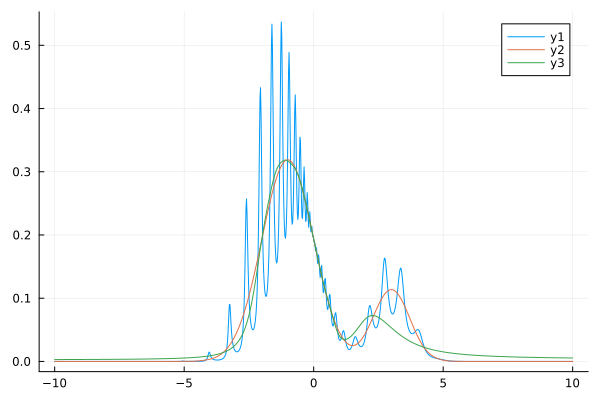

In [11]:
plot()
plot!(real.(wo_sol.reals.freq), imag.(wo_sol.reals.val)/pi)
#plot!(real.(f64_wo_sol.reals.freq), imag.(f64_wo_sol.reals.val)/pi)
plot!(Float64.(real.((sol.reals.freq))), Float64.(imag.(sol.reals.val))/pi)
plot!(Float64.(real.((f64_sol.reals.freq))), Float64.(imag.(f64_sol.reals.val))/pi)
#plot!(omegas, rho.(omegas))
#savefig("picture.png")

In [13]:
plot(xlim = [-6,6],
    legend = :topright,
#    ymirror = true, 
    xticks = [5,0,-5],
    yticks = [0.3,0,-0.3],
    xtickfont=font(15), 
    ytickfont=font(15), 
    guidefont=font(25), 
    legendfont=font(20))
plot!(xlabel=latexstring("\\omega"))
plot!(ylabel=latexstring("\\rho"))
#plot!(real.(wo_sol.reals.freq), imag.(wo_sol.reals.val/pi),label="non-opt",lw=3)
plot!(Float64.(real.((sol.reals.freq))), Float64.(imag.(sol.reals.val)/pi),label="opt 128bit",lw=3)
plot!(Float64.(real.((f64_sol.reals.freq))), Float64.(imag.(f64_sol.reals.val)/pi),label="opt 64bit",lw=3)
plot!(omegas, rho.(omegas), label="exact",lw=1.5,ls=:dash,lc=:black)
savefig("two_peak_64.svg")

"/home/kosuke/work/Nevanlinna.jl/notebooks/two_peak_64.svg"